In [2]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image
from tqdm import tqdm

from netCDF4 import Dataset

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [6]:
# 0.5x0.625
FILEDIR1 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/final_continuous_injection/gc_05x0625_eulerian_final'
NcFile1   = Dataset(FILEDIR1+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

lat1             = NcFile1.variables['lat'][:]
lon1             = NcFile1.variables['lon'][:]
EU1              = NcFile1.variables['SpeciesConc_PASV_EU2']

EU11             = NcFile1.variables['SpeciesConc_PASV_EU']

GC_AREA1 = NcFile1.variables['AREA'][:,:]


# 1*1.25
FILEDIR2 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/final_continuous_injection/gc_1x125_eulerian_final'
NcFile2   = Dataset(FILEDIR2+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')


lat2             = NcFile2.variables['lat'][:]
lon2             = NcFile2.variables['lon'][:]
EU2              = NcFile2.variables['SpeciesConc_PASV_EU2']

EU22             = NcFile2.variables['SpeciesConc_PASV_EU']

GC_AREA2 = NcFile2.variables['AREA'][:,:];


# 2*2.5
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/final_continuous_injection/gc_2x25_eulerian_final'
NcFile3   = Dataset(FILEDIR3+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

lat3             = NcFile3.variables['lat'][:]
lon3             = NcFile3.variables['lon'][:]
EU3              = NcFile3.variables['SpeciesConc_PASV_EU2']

EU33             = NcFile3.variables['SpeciesConc_PASV_EU']

GC_AREA3 = NcFile3.variables['AREA'][:,:];


# 4*5
FILEDIR4 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/final_continuous_injection/gc_4x5_eulerian_final'
NcFile4   = Dataset(FILEDIR4+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

lat4             = NcFile4.variables['lat'][:]
lon4             = NcFile4.variables['lon'][:]
EU4              = NcFile4.variables['SpeciesConc_PASV_EU2']

EU44             = NcFile4.variables['SpeciesConc_PASV_EU']

GC_AREA4 = NcFile4.variables['AREA'][:,:];


# lagrange: 2*2.5
FILEDIR0 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/final_continuous_injection/gc_2x25_lagrange_final_Volume_criterion'
NcFile0   = Dataset(FILEDIR0+'/OutputDir/GEOSChem.SpeciesConc.20150101_0010z.nc4','r',format='NETCDF4_CLASSIC')

lat0             = NcFile0.variables['lat'][:]
lon0             = NcFile0.variables['lon'][:]
LA0              = NcFile0.variables['SpeciesConc_PASV_LA2'][:,:,:,:]

LA00              = NcFile0.variables['SpeciesConc_PASV_LA'][:,:,:,:]
LA03              = NcFile0.variables['SpeciesConc_PASV_LA3'][:,:,:,:]
LA00 = LA00 + LA03

GC_AREA0 = NcFile0.variables['AREA'][:,:];



In [7]:
Nx1 = len(EU1[0,0,0,:])
Ny1 = len(EU1[0,0,:,0])
Nz1 = len(EU1[0,:,0,0])
Nt1 = len(EU1[:,0,0,0])

Nx2 = len(EU2[0,0,0,:])
Ny2 = len(EU2[0,0,:,0])
Nz2 = len(EU2[0,:,0,0])
Nt2 = len(EU2[:,0,0,0])

Nx3 = len(EU3[0,0,0,:])
Ny3 = len(EU3[0,0,:,0])
Nz3 = len(EU3[0,:,0,0])
Nt3 = len(EU3[:,0,0,0])

Nx4 = len(EU4[0,0,0,:])
Ny4 = len(EU4[0,0,:,0])
Nz4 = len(EU4[0,:,0,0])
Nt4 = len(EU4[:,0,0,0])

Nx0 = len(LA0[0,0,0,:])
Ny0 = len(LA0[0,0,:,0])
Nz0 = len(LA0[0,:,0,0])
Nt0 = len(LA0[:,0,0,0])

EU2

<class 'netCDF4._netCDF4.Variable'>
float32 SpeciesConc_PASV_EU2(time, lev, lat, lon)
    long_name: Dry mixing ratio of species PASV_EU2
    units: mol mol-1 dry
    averaging_method: instantaneous
unlimited dimensions: time
current shape = (30, 72, 181, 288)
filling off

In [8]:
del NcFile0, NcFile1, NcFile2, NcFile3, NcFile4

In [9]:
#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------

# 0.5x0.625
AD_file1 = Dataset(FILEDIR1+'/OutputDir/GEOSChem.StateMet.20150101_0000z.nc4','r',format='NETCDF4_CLASSIC')
GC_AD1   = AD_file1.variables['Met_AD']

# 1x1.25
AD_file2 = Dataset(FILEDIR2+'/OutputDir/GEOSChem.StateMet.20150101_0000z.nc4','r',format='NETCDF4_CLASSIC')
GC_AD2   = AD_file2.variables['Met_AD']

# 2x2.5
AD_file3 = Dataset(FILEDIR3+'/OutputDir/GEOSChem.StateMet.20150101_0000z.nc4','r',format='NETCDF4_CLASSIC')
GC_AD3   = AD_file3.variables['Met_AD']

# 4x5
AD_file4 = Dataset(FILEDIR4+'/OutputDir/GEOSChem.StateMet.20150101_0000z.nc4','r',format='NETCDF4_CLASSIC')
GC_AD4   = AD_file4.variables['Met_AD']

# 2x2.5
AD_file0 = Dataset(FILEDIR0+'/OutputDir/GEOSChem.StateMet.20150101_0010z.nc4','r',format='NETCDF4_CLASSIC')
GC_AD0   = AD_file0.variables['Met_AD']


In [10]:
GC_AD1

<class 'netCDF4._netCDF4.Variable'>
float32 Met_AD(time, lev, lat, lon)
    long_name: Dry air mass
    units: kg
    averaging_method: time-averaged
unlimited dimensions: time
current shape = (31, 72, 361, 576)
filling off

In [11]:
del AD_file0, AD_file1, AD_file2, AD_file3, AD_file4

In [12]:
# for 2nd order production
### change unit, do average

# 0.5x0.625
EU1_molec = EU1[:,:,:,:]*0.0
for i in range(Nt1):
    EU1_molec[i,:,:,:] = EU1[i,:,:,:]*(GC_AD1[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU1_Zsum = np.sum(EU1_molec[:,:,:,:], axis=1)
for i in range(Nt1):
    EU1_Zsum[i,:,:] = EU1_Zsum[i,:,:]/GC_AREA1[:,:]/1e4 # [molec/cm2]

EU1_Zsum_Xmean = np.mean(EU1_Zsum[:,:,:], axis=2)


# 1.0x1.25
EU2_molec = EU2[:,:,:,:]*0.0
for i in range(Nt2):
    EU2_molec[i,:,:,:] = EU2[i,:,:,:]*(GC_AD2[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU2_Zsum = np.sum(EU2_molec[:,:,:,:], axis=1)
for i in range(Nt2):
    EU2_Zsum[i,:,:] = EU2_Zsum[i,:,:]/GC_AREA2[:,:]/1e4 # [molec/cm2]

EU2_Zsum_Xmean = np.mean(EU2_Zsum[:,:,:], axis=2)


# 2.0x2.5
EU3_molec = EU3[:,:,:,:]*0.0
for i in range(Nt3):
    EU3_molec[i,:,:,:] = EU3[i,:,:,:]*(GC_AD3[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU3_Zsum = np.sum(EU3_molec[:,:,:,:], axis=1)
for i in range(Nt3):
    EU3_Zsum[i,:,:] = EU3_Zsum[i,:,:]/GC_AREA3[:,:]/1e4 # [molec/cm2]

EU3_Zsum_Xmean = np.mean(EU3_Zsum[:,:,:], axis=2)


# 4x5
EU4_molec = EU4[:,:,:,:]*0.0
for i in range(Nt4):
    EU4_molec[i,:,:,:] = EU4[i,:,:,:]*(GC_AD4[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU4_Zsum = np.sum(EU4_molec[:,:,:,:], axis=1)
for i in range(Nt4):
    EU4_Zsum[i,:,:] = EU4_Zsum[i,:,:]/GC_AREA4[:,:]/1e4 # [molec/cm2]

EU4_Zsum_Xmean = np.mean(EU4_Zsum[:,:,:], axis=2)


# lagrange: 2.0x2.5
LA0_molec = LA0[:,:,:,:]*0.0
for i in range(Nt0):
    LA0_molec[i,:,:,:] = LA0[i,:,:,:]*(GC_AD0[i,:,:,:]*1000.0/28.97)*NA


LA0_Zsum = np.sum(LA0_molec[:,:,:,:], axis=1)
for i in range(Nt0):
    LA0_Zsum[i,:,:]   = LA0_Zsum[i,:,:]/GC_AREA0[:,:]/1e4

LA0_Zsum_Xmean = np.mean(LA0_Zsum[:,:,:], axis=2)

del EU1, EU2, EU3, EU4, LA0

In [13]:
# for injected tracer

### change unit, do average

# 0.5x0.625
EU11_molec = EU11[:,:,:,:]*0.0
for i in range(Nt1):
    EU11_molec[i,:,:,:] = EU11[i,:,:,:]*(GC_AD1[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]

del EU11

# 1.0x1.25
EU22_molec = EU22[:,:,:,:]*0.0
for i in range(Nt2):
    EU22_molec[i,:,:,:] = EU22[i,:,:,:]*(GC_AD2[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
del EU22

# 2.0x2.5
EU33_molec = EU33[:,:,:,:]*0.0
for i in range(Nt3):
    EU33_molec[i,:,:,:] = EU33[i,:,:,:]*(GC_AD3[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]

del EU33

# 4x5
EU44_molec = EU44[:,:,:,:]*0.0
for i in range(Nt4):
    EU44_molec[i,:,:,:] = EU44[i,:,:,:]*(GC_AD4[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    
del EU44

# lagrange: 2.0x2.5
LA00_molec = LA00[:,:,:,:]*0.0
for i in range(Nt0):
    LA00_molec[i,:,:,:] = LA00[i,:,:,:]*(GC_AD0[i,:,:,:]*1000.0/28.97)*NA

del LA00

In [14]:
t = Nt1-1

print(f'Total tracer mass [molec] in the end: ')
print(f'Euletian 0.5x0.625 = {np.sum(EU11_molec[t,:,:,:])}')
print(f'Euletian 1.0x1.25  = {np.sum(EU22_molec[t,:,:,:])}')
print(f'Euletian 2x2.5     = {np.sum(EU33_molec[t,:,:,:])}')
print(f'Euletian 4x5       = {np.sum(EU44_molec[t,:,:,:])}')
print(f'plume model 2*2.5  = {np.sum(LA00_molec[t,:,:,:])}')
print('')

print(f'Total 2nd production mass [molec] in the end: ')
print(f'Euletian 0.5x0.625 = {np.sum(EU1_molec[t,:,:,:])}')
print(f'Euletian 1.0x1.25  = {np.sum(EU2_molec[t,:,:,:])}')
print(f'Euletian 2x2.5     = {np.sum(EU3_molec[t,:,:,:])}')
print(f'Euletian 4x5       = {np.sum(EU4_molec[t,:,:,:])}')
print(f'plume model 2*2.5  = {np.sum(LA0_molec[t,:,:,:])}')
print('')

print(f'Euletian 0.5x0.625 = {np.sum(EU1_molec[t,:,:,:])/np.sum(EU11_molec[t,:,:,:])}')
print(f'Euletian 1.0x1.25  = {np.sum(EU2_molec[t,:,:,:])/np.sum(EU22_molec[t,:,:,:])}')
print(f'Euletian 2x2.5     = {np.sum(EU3_molec[t,:,:,:])/np.sum(EU33_molec[t,:,:,:])}')
print(f'Euletian 4x5       = {np.sum(EU4_molec[t,:,:,:])/np.sum(EU44_molec[t,:,:,:])}')
print(f'plume model 2*2.5  = {np.sum(LA0_molec[t,:,:,:])/np.sum(LA00_molec[t,:,:,:])}')

Total tracer mass [molec] in the end: 
Euletian 0.5x0.625 = 1.0510222154708283e+32
Euletian 1.0x1.25  = 1.0510169929112876e+32
Euletian 2x2.5     = 1.051016896197222e+32
Euletian 4x5       = 1.0510170896253531e+32
plume model 2*2.5  = 1.0486736111025466e+32

Total 2nd production mass [molec] in the end: 
Euletian 0.5x0.625 = 5.180571799744383e+26
Euletian 1.0x1.25  = 4.793315612056184e+26
Euletian 2x2.5     = 4.472049330877747e+26
Euletian 4x5       = 4.3033789438956136e+26
plume model 2*2.5  = 1.3257554663488904e+29

Euletian 0.5x0.625 = 4.929079295834526e-06
Euletian 1.0x1.25  = 4.560645265883068e-06
Euletian 2x2.5     = 4.254973646311555e-06
Euletian 4x5       = 4.094490122952266e-06
plume model 2*2.5  = 0.0012642212677747011


In [15]:
# tropical region

print(f'Total tracer mass [molec] in the end: ')
print(f'Euletian 0.5x0.625 = {np.sum(EU11_molec[t,:,120:240,:])}')
print(f'Euletian 1.0x1.25  = {np.sum(EU22_molec[t,:,60:120,:])}')
print(f'Euletian 2x2.5     = {np.sum(EU33_molec[t,:,30:60,:])}')
print(f'Euletian 4x5       = {np.sum(EU44_molec[t,:,15:30,:])}')
print(f'plume model 2*2.5  = {np.sum(LA00_molec[t,:,30:60,:])}')
print('')

print(f'Total 2nd production mass [molec] in the end: ')
print(f'Euletian 0.5x0.625 = {np.sum(EU1_molec[t,:,120:240,:])}')
print(f'Euletian 1.0x1.25  = {np.sum(EU2_molec[t,:,60:120,:])}')
print(f'Euletian 2x2.5     = {np.sum(EU3_molec[t,:,30:60,:])}')
print(f'Euletian 4x5       = {np.sum(EU4_molec[t,:,15:30,:])}')
print(f'plume model 2*2.5  = {np.sum(LA0_molec[t,:,30:60,:])}')
print('')

print(f'Euletian 0.5x0.625 = {np.sum(EU1_molec[t,:,120:240,:])/np.sum(EU11_molec[t,:,120:240,:])}')
print(f'Euletian 1.0x1.25  = {np.sum(EU2_molec[t,:,60:120,:])/np.sum(EU22_molec[t,:,60:120,:])}')
print(f'Euletian 2x2.5     = {np.sum(EU3_molec[t,:,30:60,:])/np.sum(EU33_molec[t,:,30:60,:])}')
print(f'Euletian 4x5       = {np.sum(EU4_molec[t,:,15:30,:])/np.sum(EU44_molec[t,:,15:30,:])}')
print(f'plume model 2*2.5  = {np.sum(LA0_molec[t,:,30:60,:])/np.sum(LA00_molec[t,:,30:60,:])}')

print( len(lat1),len(lat2),len(lat3),len(lat4) )
print(lat1[120],lat1[240])
print(lat2[60],lat2[120])
print(lat3[30],lat3[60])
print(lat4[15],lat4[30])


Total tracer mass [molec] in the end: 
Euletian 0.5x0.625 = 9.059570166750725e+31
Euletian 1.0x1.25  = 9.072721345386821e+31
Euletian 2x2.5     = 9.065541293158966e+31
Euletian 4x5       = 8.988590746888855e+31
plume model 2*2.5  = 9.15146593757324e+31

Total 2nd production mass [molec] in the end: 
Euletian 0.5x0.625 = 4.286195432856072e+26
Euletian 1.0x1.25  = 4.020509929441485e+26
Euletian 2x2.5     = 3.7543968304992694e+26
Euletian 4x5       = 3.548641847101113e+26
plume model 2*2.5  = 1.1266587953791723e+29

Euletian 0.5x0.625 = 4.731124590762192e-06
Euletian 1.0x1.25  = 4.431426532391924e-06
Euletian 2x2.5     = 4.1413927647226956e-06
Euletian 4x5       = 3.9479400584241375e-06
plume model 2*2.5  = 0.0012311238097026944
361 181 91 46
-30.0 30.0
-30.0 30.0
-30.0 30.0
-30.0 30.0


30

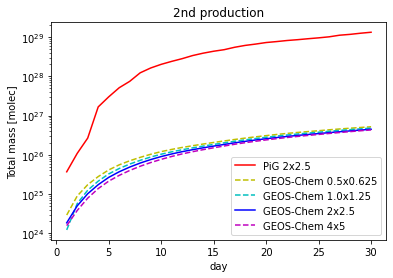

In [19]:
# 2nd order

LA0_mass = []
EU1_mass = []
EU2_mass = []
EU3_mass = []
EU4_mass = []
days = []

for i in range(Nt1):
    days.append(i+1)
    LA0_mass.append(np.sum(LA0_molec[i,:,:,:]))
    EU1_mass.append(np.sum(EU1_molec[i,:,:,:]))
    EU2_mass.append(np.sum(EU2_molec[i,:,:,:]))
    EU3_mass.append(np.sum(EU3_molec[i,:,:,:]))
    EU4_mass.append(np.sum(EU4_molec[i,:,:,:]))
    
plt.plot(days, LA0_mass, 'r', label='PiG 2x2.5');

plt.plot(days, EU1_mass, 'y--', label='GEOS-Chem 0.5x0.625');
plt.plot(days, EU2_mass, 'c--', label='GEOS-Chem 1.0x1.25');
plt.plot(days, EU3_mass, 'b', label='GEOS-Chem 2x2.5');
plt.plot(days, EU4_mass, 'm--', label='GEOS-Chem 4x5');

plt.yscale('log')


plt.title('2nd production');
plt.xlabel('day');
plt.ylabel('Total mass [molec]');
plt.legend();

days[-1]

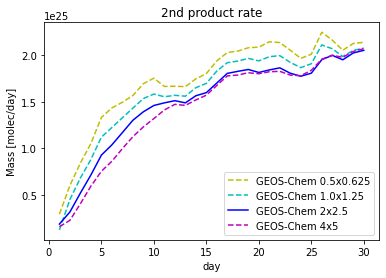

In [17]:
LA0_mass_day = [LA0_mass[0]]
EU1_mass_day = [EU1_mass[0]]
EU2_mass_day = [EU2_mass[0]]
EU3_mass_day = [EU3_mass[0]]
EU4_mass_day = [EU4_mass[0]]

for i in np.arange(1,Nt1,1):
    LA0_mass_day.append( LA0_mass[i]-LA0_mass[i-1] )
    EU1_mass_day.append( EU1_mass[i]-EU1_mass[i-1] )
    EU2_mass_day.append( EU2_mass[i]-EU2_mass[i-1] )
    EU3_mass_day.append( EU3_mass[i]-EU3_mass[i-1] )
    EU4_mass_day.append( EU4_mass[i]-EU4_mass[i-1] )
    

# plt.plot(days, LA0_mass_day, 'r', label='PiG 2x2.5');

plt.plot(days, EU1_mass_day, 'y--', label='GEOS-Chem 0.5x0.625');
plt.plot(days, EU2_mass_day, 'c--', label='GEOS-Chem 1.0x1.25');
plt.plot(days, EU3_mass_day, 'b', label='GEOS-Chem 2x2.5');
plt.plot(days, EU4_mass_day, 'm--', label='GEOS-Chem 4x5');

# plt.yscale('log')


plt.title('2nd product rate');
plt.xlabel('day');
plt.ylabel('Mass [molec/day]');
plt.legend();

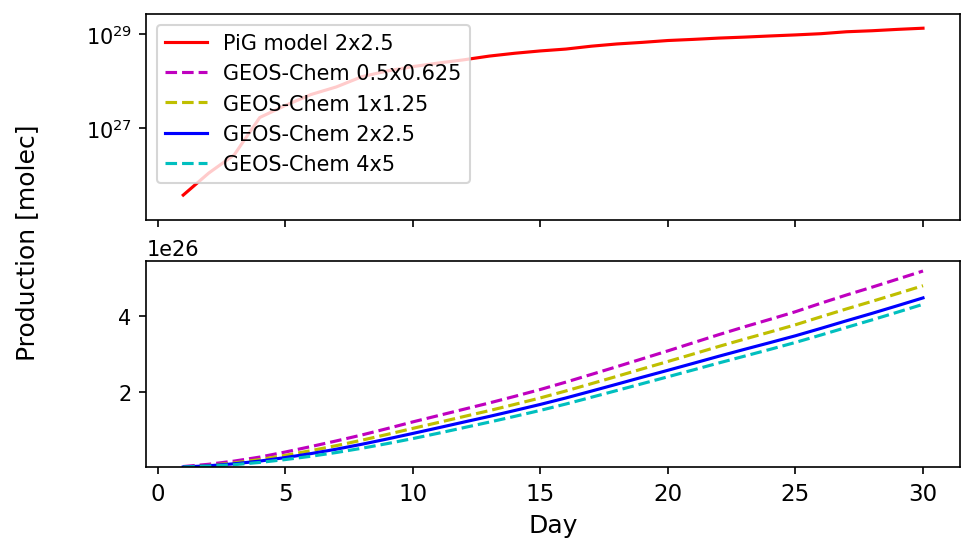

In [30]:

f, (ax, ax2) = plt.subplots(2, 1, figsize=(7,4), sharex=True, dpi=150)

# plot the same data on both axes
ax.plot(days, LA0_mass,  'r', label='PiG model 2x2.5')
ax.plot(days, np.array(LA0_mass)*0, 'm--',label='GEOS-Chem 0.5x0.625')
ax.plot(days, np.array(LA0_mass)*0, 'y--', label='GEOS-Chem 1x1.25')
ax.plot(days, np.array(LA0_mass)*0, 'b', label='GEOS-Chem 2x2.5')
ax.plot(days, np.array(LA0_mass)*0, 'c--', label='GEOS-Chem 4x5')

ax.legend(loc='upper left')
ax.set_ylim(LA0_mass[1]*0.1, LA0_mass[-1]*2)  # outliers only
ax.set_yscale('log')

# tick_locs = [1e25,1e26,1e27,1e28,1e29]
# tick_lbls = ['1e25','1e26','1e27','1e28','1e29']
# ax.set_yticks(np.array(tick_locs))
# ax.set_yticklabels(tick_lbls,fontsize=11)


ax2.plot(days, EU1_mass, 'm--', label='Eulerian 0.5x0.625')
ax2.plot(days, EU2_mass, 'y--', label='Eulerian 1x1.25')
ax2.plot(days, EU3_mass, 'b', label='Eulerian 2x2.5')
ax2.plot(days, EU4_mass, 'c--', label='Eulerian 4x5')

ax2.set_ylim(0.95*min(EU1_mass[0], EU4_mass[0]), 1.05*max(EU1_mass[-1], EU4_mass[-1]))  # most of the data
# ax2.set_yscale('log')

# tick_locs = [1.2e24,1.4e24,1.6e24,1.8e24,2.0e24,2.2e24]
# tick_lbls = ['1.2e24','1.4e24','1.6e24','1.8e24','2.0e24','2.2e24']
# tick_locs = [1e24,1e25,1e26,1e27]
# tick_lbls = ['1e24','1e25','1e26',"1e27"]
# ax2.set_yticks(np.array(tick_locs))
# ax2.set_yticklabels(tick_lbls,fontsize=11)

ax2.tick_params(axis='x', labelsize=11);


f.text(1e-10, 0.5, 'Production [molec]', va='center', rotation='vertical',fontsize=12)

# ax2.set_ylabel('s', loc='top')
plt.xlabel('Day',fontsize=12)
plt.show()

In [14]:
# plt.plot(np.array(EU2_mass)-EU3_mass, label='Eulerian 1x1.25 - Eulerian 2x2.5')
# plt.title('2nd production');
# plt.xlabel('day');
# plt.ylabel('Total mass [molec]');
# plt.legend();
np.array(EU2_mass)-EU3_mass

array([-6.3134544e+23,  7.1174629e+23,  2.3297534e+24,  3.9963372e+24,
        5.9283132e+24,  7.7913997e+24,  9.3807597e+24,  1.0677372e+25,
        1.2100137e+25,  1.3326887e+25,  1.3984163e+25,  1.4561851e+25,
        1.5279457e+25,  1.6147431e+25,  1.7145769e+25,  1.8438369e+25,
        1.9587472e+25,  2.0692672e+25,  2.1879905e+25,  2.3122717e+25,
        2.4548466e+25,  2.5859125e+25,  2.7022008e+25,  2.7948920e+25,
        2.8961868e+25,  3.0545705e+25,  3.1251773e+25,  3.1608459e+25,
        3.1882947e+25,  3.2126628e+25], dtype=float32)

In [23]:
CPU_La0 = 18*24+1 #3*24+3.7

CPU_Eu1 = 19*24+19.5+2 #19*24+19.5
CPU_Eu2 = 7*24+16.2+1.5 #7*24+16.2
CPU_Eu3 = 2*24+15.1+1 #2*24+15.1
CPU_Eu4 = 23+0.5 #23

CPU_Eus = [CPU_Eu1, CPU_Eu2,CPU_Eu3,CPU_Eu4]
Mass_Eus = [EU1_mass[-1], EU2_mass[-1], EU3_mass[-1], EU4_mass[-1]]

In [24]:
CPU_Eus, CPU_La0

([477.5, 185.7, 64.1, 23.5], 433)

In [25]:
Mass_Eus

[5.1805718e+26, 4.7933156e+26, 4.4720493e+26, 4.303379e+26]

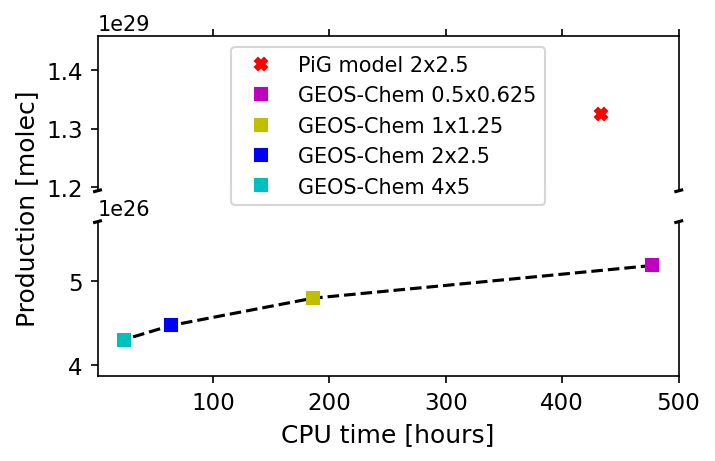

In [29]:

f, (ax, ax2) = plt.subplots(2, 1, figsize=(5,3), sharex=True, dpi=150)

# plot the same data on both axes
ax.plot(CPU_La0, LA0_mass[-1],  'r',  marker='X', linestyle='None',label='PiG model 2x2.5')
ax.plot(CPU_Eu1, 0, 'm', marker='s', linestyle='None',label='GEOS-Chem 0.5x0.625')
ax.plot(CPU_Eu2, 0, 'y',  marker='s', linestyle='None',label='GEOS-Chem 1x1.25')
ax.plot(CPU_Eu3, 0, 'b', marker='s', linestyle='None',label='GEOS-Chem 2x2.5')
ax.plot(CPU_Eu4, 0, 'c', marker='s', linestyle='None',label='GEOS-Chem 4x5')
ax.legend(loc='upper center')

ax2.plot(CPU_Eus, Mass_Eus, 'k--')
ax2.plot(CPU_Eu1, EU1_mass[-1], 'm', marker='s', label='Eulerian 0.5x0.625')
ax2.plot(CPU_Eu2, EU2_mass[-1], 'y',  marker='s', label='Eulerian 1x1.25')
ax2.plot(CPU_Eu3, EU3_mass[-1], 'b', marker='s', label='Eulerian 2x2.5')
ax2.plot(CPU_Eu4, EU4_mass[-1], 'c', marker='s', label='Eulerian 4x5')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(LA0_mass[-1]*0.9, LA0_mass[-1]*1.1)  # outliers only
ax2.set_ylim(0.9*min(EU1_mass[-1], EU4_mass[-1]), 1.1*max(EU1_mass[-1], EU4_mass[-1]))  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax.tick_params(axis='y', labelsize=11);
ax2.tick_params(axis='x', labelsize=11);
ax2.tick_params(axis='y', labelsize=11);


# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .005  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

# ax2.set_ylabel('2nd production [molec]', loc='top')

f.text(1.5e-2, 0.5, 'Production [molec]', va='center', rotation='vertical',fontsize=12)

plt.xlabel('CPU time [hours]',fontsize=12)
plt.show()

In [19]:
print('lagrange 2*2.5:    ', np.sum(LA0_Zsum_Xmean[Nt1-1,:]))

print('Eulerian 0.5*0.625:', np.sum(EU1_Zsum_Xmean[Nt1-1,:]))
print('Eulerian 1*1.25:   ', np.sum(EU2_Zsum_Xmean[Nt1-1,:]))
print('Eulerian 2*2.5:    ', np.sum(EU3_Zsum_Xmean[Nt1-1,:]))
print('Eulerian 4*5:      ', np.sum(EU4_Zsum_Xmean[Nt1-1,:]))


lagrange 2*2.5:     17092444493.777777
Eulerian 0.5*0.625: 145792130.8611111
Eulerian 1*1.25:    61560899.44444445
Eulerian 2*2.5:     27210066.458333336
Eulerian 4*5:       12436286.333333334
